In [1]:
import torchaudio as ta
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
from utils import get_audio_paths, mask_random_subbands, draw_spec, plot_hist
from dataset import FeatureExtractorDataset
import sys
from IPython.display import Audio, display
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import numpy as np
from utils import *
import sys
import os

In [4]:
path_dir = [
    "/mnt/hdd/Dataset_BESSL_p2/FSD50K_WB_SEGMENT",
    "/mnt/hdd/Dataset_BESSL_p2/MUSDB_WB_SEGMENT_", 
    "/mnt/hdd/Dataset_BESSL_p2/VCTK_WB_SEGMENT_"
                ]
path_spec = [
    "/mnt/hdd/Dataset_BESSL_p2/FSD_spec",
    "/mnt/hdd/Dataset_BESSL_p2/MUSDB_spec",
    "/mnt/hdd/Dataset_BESSL_p2/VCTK_spec",
]
dataset = FeatureExtractorDataset(path_dir, spectrogram_dir=path_spec)


# DataLoader Example
spec_e, masked_spec_e, filename = dataset[3]
dataloader = DataLoader(dataset, batch_size=1024)

for spec, mask, file in dataloader:
    print(spec.shape)
    break
    

# print(len(dataset)*0.03)

# # 불러온 데이터를 출력
# print(f"Filename: {filename}")
# print(f"Spectrogram (spec_e) Shape: {spec_e.shape}")
# print(f"Masked Spectrogram (masked_spec_e) Shape: {masked_spec_e.shape}")

GT 290692 file numbers loaded!
torch.Size([1024, 1, 832, 47])


In [6]:
a = get_audio_paths(path_dir[0])
print(a[:2])

a = get_audio_paths(path_spec[0], file_extensions='.pt')
print(a[:2])

a = dataset.spec_e_paths
print(a[:5])

['/mnt/hdd/Dataset_BESSL_p2/FSD50K_WB_SEGMENT/FSD50K.dev_audio/100006_mono_segment_0.wav', '/mnt/hdd/Dataset_BESSL_p2/FSD50K_WB_SEGMENT/FSD50K.dev_audio/100007_mono_segment_0.wav']
['/mnt/hdd/Dataset_BESSL_p2/FSD_spec/FSD50K.dev_audio/100006_mono_segment_0.wav_masked_spec_e.pt', '/mnt/hdd/Dataset_BESSL_p2/FSD_spec/FSD50K.dev_audio/100006_mono_segment_0.wav_spec_e.pt']
['/mnt/hdd/Dataset_BESSL_p2/FSD_spec/FSD50K.dev_audio/100006_mono_segment_0.wav_spec_e.pt', '/mnt/hdd/Dataset_BESSL_p2/FSD_spec/FSD50K.dev_audio/100007_mono_segment_0.wav_spec_e.pt', '/mnt/hdd/Dataset_BESSL_p2/FSD_spec/FSD50K.dev_audio/10000_mono_segment_0.wav_spec_e.pt', '/mnt/hdd/Dataset_BESSL_p2/FSD_spec/FSD50K.dev_audio/100011_mono_segment_0.wav_spec_e.pt', '/mnt/hdd/Dataset_BESSL_p2/FSD_spec/FSD50K.dev_audio/100011_mono_segment_1.wav_spec_e.pt']


GT 290692 file numbers loaded!
['/mnt/hdd/Dataset_BESSL_p2/FSD_spec', '/mnt/hdd/Dataset_BESSL_p2/MUSDB_spec', '/mnt/hdd/Dataset_BESSL_p2/VCTK_spec']
True
('/mnt/hdd/Dataset_BESSL_p2/FSD50K_WB_SEGMENT/FSD50K.dev_audio/345699_mono_segment_3.wav',)
torch.Size([1, 1, 832, 47]) : SPECE Shape
Min value: -1.1126405
Max value: 1.7501957


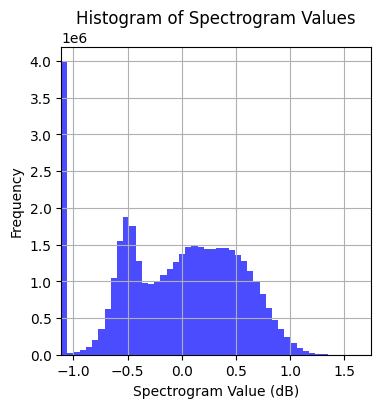

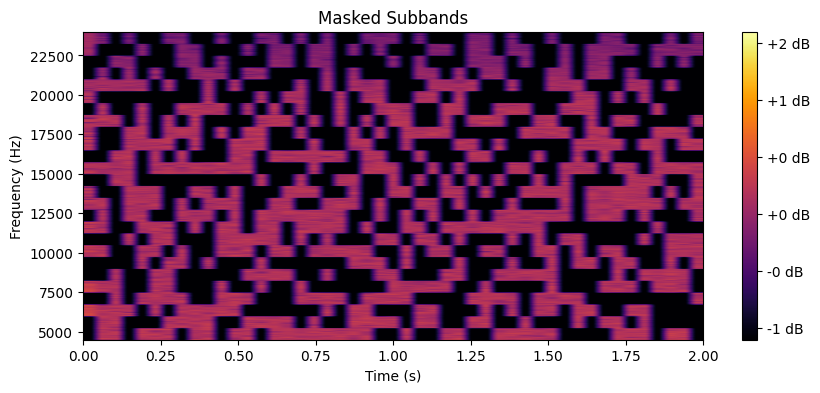

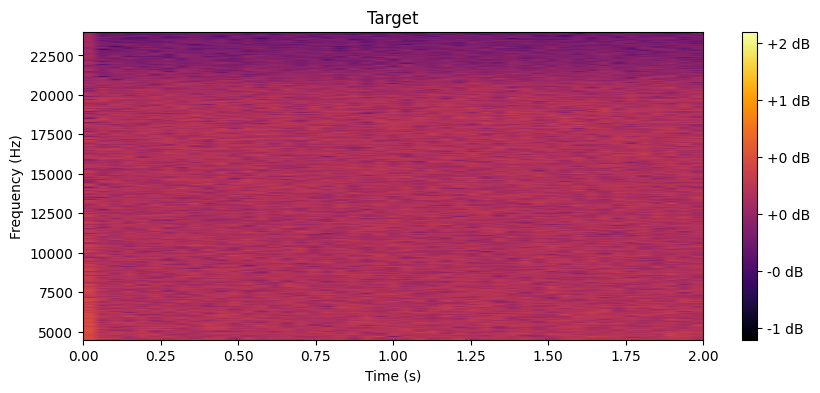

torch.Size([1, 96000])


('/mnt/hdd/Dataset_BESSL_p2/FSD50K_WB_SEGMENT/FSD50K.dev_audio/63219_mono_segment_12.wav',)
torch.Size([1, 1, 832, 47]) : SPECE Shape
Min value: -1.1126405
Max value: 1.7501957


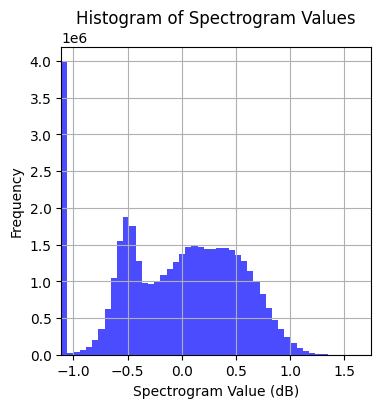

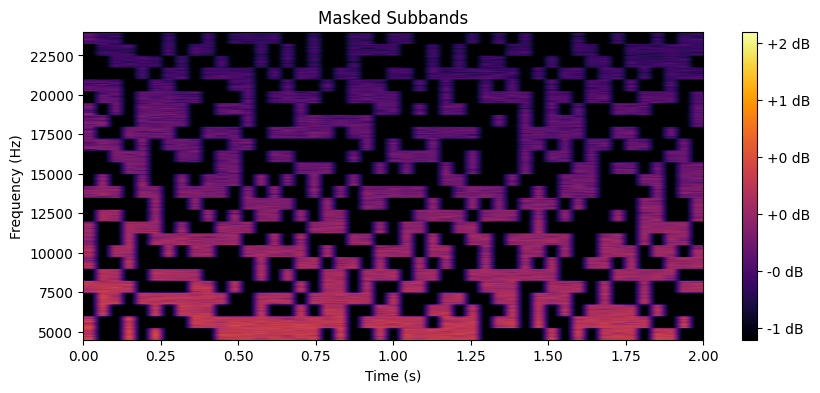

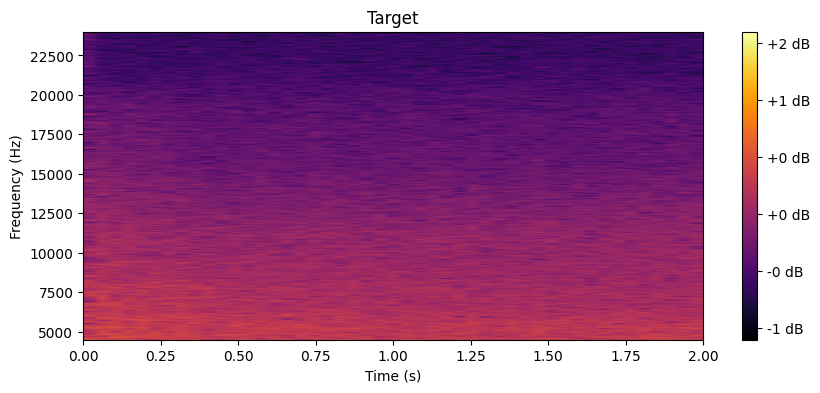

torch.Size([1, 96000])


('/mnt/hdd/Dataset_BESSL_p2/VCTK_WB_SEGMENT_/train/p311/p311_081_mic1_segment_0.wav',)
torch.Size([1, 1, 832, 47]) : SPECE Shape
Min value: -1.1126405
Max value: 1.7501957


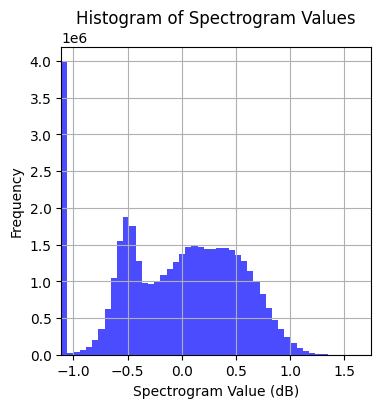

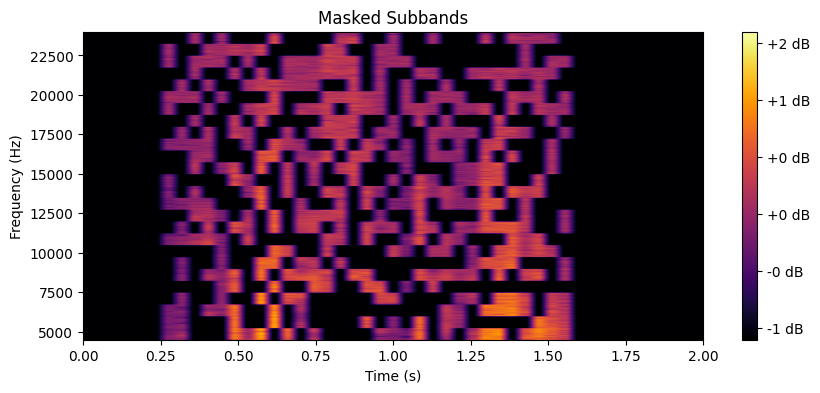

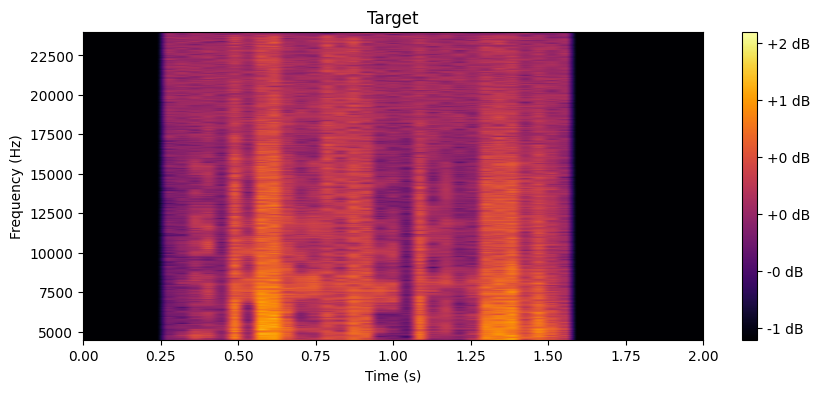

torch.Size([1, 96000])


torch.Size([832, 47])


In [5]:
# path_dir_wb = [
#     # "/mnt/hdd/Dataset_BESSL_p2/MUSDB_WB_SEGMENT_", 
#     "/mnt/hdd/Dataset_BESSL_p2/VCTK_WB_SEGMENT_"
#                         ]

dataset = FeatureExtractorDataset(path_dir, spectrogram_dir=path_spec, return_wave=True)
# dataset = FeatureExtractorDataset(path_dir_wb, seg_len=2, return_wave=True)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

print(dataset.spectrogram_dir)
print(dataset.return_wave)

## Dataset
b = 0
for wb, spec_e, spec_mask_e, name in dataloader:
    b += 1

    print(name)
    print(spec_e.shape,": SPECE Shape")
    plot_hist(spec)
    
    # spec = spec[0,0,:,:]
    # print(spec.shape)
    # draw_spec(spec, sample_rate=48000,)

    spec_mask_e = spec_mask_e[0,0,:,:]
    draw_spec(spec_mask_e, sample_rate=48000, freq_range=[6,31], title="Masked Subbands")

    spec_e = spec_e[0,0,:,:]
    draw_spec(spec_e, sample_rate=48000, freq_range=[6,31], title="Target")

    wb = wb[0,...]
    print(wb.shape)
    display(Audio(wb.squeeze().numpy(),rate=48000))
    if b == 3:
        break

print(spec_e.shape)
#### 288 x T

In [ ]:
y, sr = librosa.load("/mnt/hdd/Dataset_BESSL_p2/VCTK_WB_SEGMENT_/train/p345/p345_216_mic1_segment_0.wav", sr=None)
y.shape

(95993,)